In [105]:
from sympy import (symbols, init_printing, exp, I, pi, fourier_transform, integrate, oo, sqrt, fourier_transform,
                   inverse_fourier_transform, solve, simplify)
init_printing()

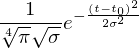

In [20]:
t, t0, nu, nu0, omega = symbols("t, t0, nu, nu0, omega", real=True)

A, tau, sigma, epsilon, R = symbols("A, tau, sigma, epsilon, R", positive=True)
n = symbols("n", integer=True)

f = exp(-((t-t0)/sigma)**2/2) / sqrt(sigma*sqrt(pi))
f

In [21]:
integrate(f**2, (t, -oo, oo))

In [30]:
fhat = fourier_transform(f, t, nu)
fhat

The amplitude FWHM in time.

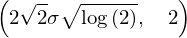

In [70]:
fwhm_amp_t = solve(f.subs(t, t0)/2-f, t)
fwhm_amp_t = fwhm_amp_t[1]-fwhm_amp_t[0]
fwhm_amp_t, f.subs(t, t0)/f.subs(t, t0+ fwhm_amp_t/2)

The amplitude FWHM in frequency.

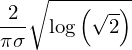

In [55]:
fwhm_amp_nu = solve(abs(fhat).subs(nu, 0)/2 - abs(fhat), nu)
fwhm_amp_nu = fwhm_amp_nu[3]-fwhm_amp_nu[2]
fwhm_amp_nu

The power FWHM in time

In [79]:
fwhm_pow_t = solve(abs(f.subs(t, t0))**2/2- abs(f)**2, t)
fwhm_pow_t = fwhm_pow_t[1] - fwhm_pow_t[0]
fwhm_pow_t

The power FWHM in frequency.

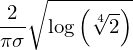

In [80]:
P_spectrum = abs(fhat)**2
fwhm_pow_nu = solve(P_spectrum.subs(nu, 0)/2-P_spectrum, nu)
fwhm_pow_nu = fwhm_pow_nu[3]-fwhm_pow_nu[2]
fwhm_pow_nu

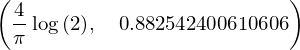

In [109]:
simplify(fwhm_amp_t*fwhm_amp_nu), (fwhm_amp_t*fwhm_amp_nu).n()

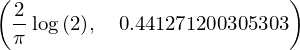

In [108]:
simplify(fwhm_pow_nu*fwhm_pow_t), (fwhm_pow_t*fwhm_pow_nu).n()

We are interested, however, in the relation between the power frequency FWHM, and the amplitude time FWHM.

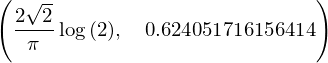

In [111]:
simplify(fwhm_pow_nu*fwhm_amp_t), (fwhm_pow_nu*fwhm_amp_t).n()

In [112]:
import numpy as np

In [113]:
tau1 = 1e-9
sig_power1 = np.sqrt(8.0)*np.log(2.0)/np.pi/tau1
print "For 1 ns: %2.4f GHz" % (sig_power1*1e-9)
print 

For 1 ns: 0.6241 GHz



In [114]:
sig_power1 = 1e9
tau1 = np.sqrt(8.0)*np.log(2.0)/np.pi/sig_power1
print "For 1 GHz: %2.4f ns" % (tau1*1e9)

For 1 GHz: 0.6241 ns


In [115]:
from sympy import sech

In [117]:
fourier_transform(sech(t), t, nu)

In [25]:
tooth = A*exp(-((nu-n*R)/epsilon)**2/2)
tooth

In [27]:
inverse_fourier_transform(tooth, nu, t)

In [26]:
inverse_fourier_transform(tooth, nu, t).subs(n, 0)

In [28]:
inverse_fourier_transform?

In [8]:
fourier_transform(f, t, nu)

In [9]:
fourier_transform(f, t, nu).subs(t0, 0)

In [15]:
fourier_transform?